Ex. 1

1

a) + b)

---



In [2]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')

data = np.loadtxt('./date.csv')
x_1 = data[:, 0]
y_1 = data[:, 1]

order = 5

sd10 = 10
sd100 = 100
sd_array = np.array([10, 0.1, 0.1, 0.1, 0.1])

x_p = np.vstack([x_1 ** i for i in range(1, order+1)])
x_1s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
x_1s = x_1s.T
y_1s = (y_1 - y_1.mean()) / y_1.std()

with pm.Model() as model_p10:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=sd10, shape=order)
    epsilon = pm.HalfNormal('epsilon', 5)

    mu = alpha + pm.math.dot(x_1s, beta)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)

    trace_p10 = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_p100:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=sd100, shape=order)
    epsilon = pm.HalfNormal('epsilon', 5)

    mu = alpha + pm.math.dot(x_1s, beta)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)

    trace_p100 = pm.sample(2000, return_inferencedata=True)

with pm.Model() as model_variable:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=sd_array, shape=order)
    epsilon = pm.HalfNormal('epsilon', 5)

    mu = alpha + pm.math.dot(x_1s, beta)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)

    trace_variable = pm.sample(2000, return_inferencedata=True)

Output()

Output()

ERROR:pymc.stats.convergence:There were 18 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

Output()

ERROR:pymc.stats.convergence:There were 298 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

Output()

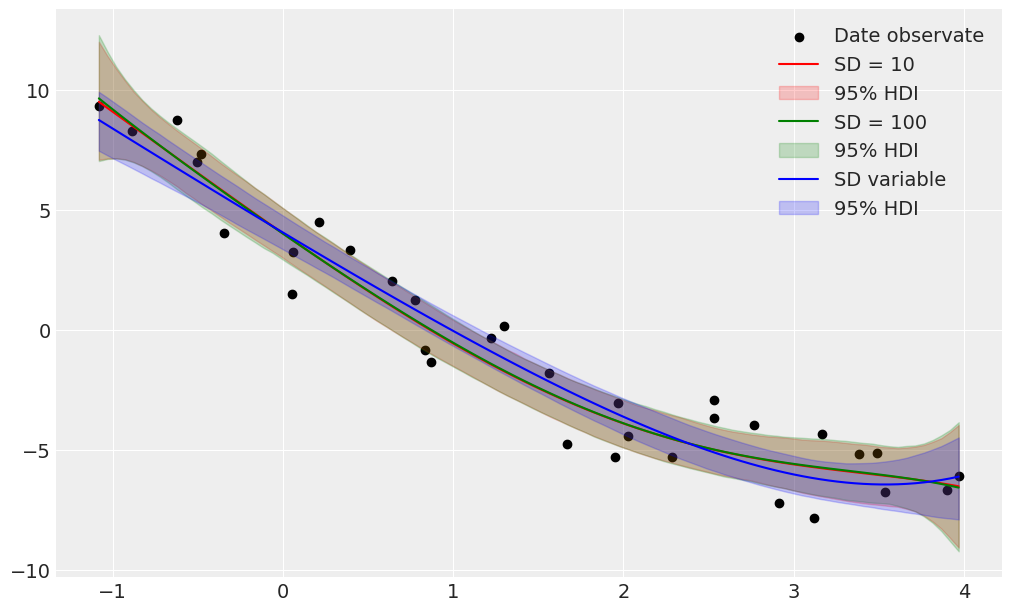

In [6]:
def create_polynomial_features(x, order):
    x_1p = np.vstack([x**i for i in range(1, order+1)])
    x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
    return x_1s.T

x_new = np.linspace(x_1.min(), x_1.max(), 100)
x_new_s = create_polynomial_features(x_new, order)

fig, ax = plt.subplots(figsize=(10, 6))

alpha_samples = trace_p10.posterior['alpha'].values.flatten()
beta_samples = trace_p10.posterior['beta'].values.reshape(-1, order)

y_pred_samples = []
for i in range(len(alpha_samples)):
    y_pred = alpha_samples[i] + np.dot(x_new_s, beta_samples[i])
    y_pred = y_pred * y_1.std() + y_1.mean()
    y_pred_samples.append(y_pred)

y_pred_samples = np.array(y_pred_samples)

mean_pred = np.mean(y_pred_samples, axis=0)
hdi_lower = np.percentile(y_pred_samples, 2.5, axis=0)
hdi_upper = np.percentile(y_pred_samples, 97.5, axis=0)

ax.scatter(x_1, y_1, color='black', label='Date observate')
ax.plot(x_new, mean_pred, color='red', label='SD = 10')
ax.fill_between(x_new, hdi_lower, hdi_upper, color='red', alpha=0.2, label='95% HDI')
ax.legend()


#fig, ax = plt.subplots(figsize=(10, 6))

alpha_samples = trace_p100.posterior['alpha'].values.flatten()
beta_samples = trace_p100.posterior['beta'].values.reshape(-1, order)

y_pred_samples = []
for i in range(len(alpha_samples)):
    y_pred = alpha_samples[i] + np.dot(x_new_s, beta_samples[i])
    y_pred = y_pred * y_1.std() + y_1.mean()
    y_pred_samples.append(y_pred)

y_pred_samples = np.array(y_pred_samples)

mean_pred = np.mean(y_pred_samples, axis=0)
hdi_lower = np.percentile(y_pred_samples, 2.5, axis=0)
hdi_upper = np.percentile(y_pred_samples, 97.5, axis=0)

ax.plot(x_new, mean_pred, color='green', label='SD = 100')
ax.fill_between(x_new, hdi_lower, hdi_upper, color='green', alpha=0.2, label='95% HDI')
ax.legend()

#fig, ax = plt.subplots(figsize=(10, 6))

alpha_samples = trace_variable.posterior['alpha'].values.flatten()
beta_samples = trace_variable.posterior['beta'].values.reshape(-1, order)

y_pred_samples = []
for i in range(len(alpha_samples)):
    y_pred = alpha_samples[i] + np.dot(x_new_s, beta_samples[i])
    y_pred = y_pred * y_1.std() + y_1.mean()
    y_pred_samples.append(y_pred)

y_pred_samples = np.array(y_pred_samples)

mean_pred = np.mean(y_pred_samples, axis=0)
hdi_lower = np.percentile(y_pred_samples, 2.5, axis=0)
hdi_upper = np.percentile(y_pred_samples, 97.5, axis=0)

ax.plot(x_new, mean_pred, color='blue', label='SD variable')
ax.fill_between(x_new, hdi_lower, hdi_upper, color='blue', alpha=0.2, label='95% HDI')
ax.legend()

Ex. 1

2

---



Ex. 1

3

Output()

Output()

Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


Output()

Output()

Output()

         rank  elpd_waic    p_waic  elpd_diff   weight        se       dse  \
model_q     0   8.973685  2.594863   0.000000  0.72719  4.571893  0.000000   
model_c     1  10.998073  3.358214   2.024388  0.27198  4.604802  0.700229   
model_l     2  28.582723  2.372817  19.609037  0.00083  5.292426  5.335623   

         warning     scale  
model_q    False  deviance  
model_c    False  deviance  
model_l    False  deviance  


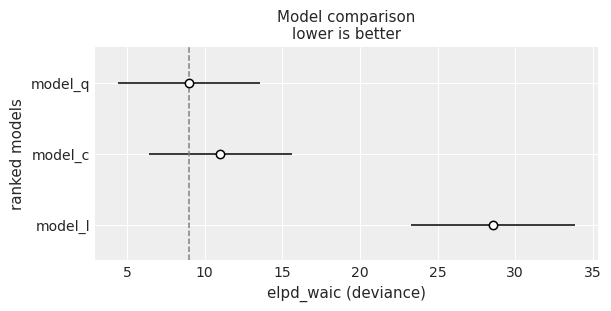

In [ ]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')

data = np.loadtxt('./date.csv')
x_1 = data[:, 0]
y_1 = data[:, 1]

order = 1   #liniar
x_p = np.vstack([x_1 ** i for i in range(1, order + 1)])
x_1s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()

with pm.Model() as model_l:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=1)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + beta * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)
    idata_l = pm.sample(2000, init='jitter+adapt_diag', return_inferencedata=True)

order = 2   #quadratic
x_p = np.vstack([x_1 ** i for i in range(1, order + 1)])
x_2s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
y_2s = (y_1 - y_1.mean()) / y_1.std()

with pm.Model() as model_q:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_2s)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_2s)
    idata_q = pm.sample(2000, init='jitter+adapt_diag', return_inferencedata=True)

order = 3   #cubic
x_p = np.vstack([x_1 ** i for i in range(1, order + 1)])
x_3s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
y_3s = (y_1 - y_1.mean()) / y_1.std()

with pm.Model() as model_c:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=3)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_3s)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_3s)
    idata_c = pm.sample(2000, init='jitter+adapt_diag', return_inferencedata=True)

pm.compute_log_likelihood(idata_l, model=model_l)
pm.compute_log_likelihood(idata_q, model=model_q)
pm.compute_log_likelihood(idata_c, model=model_c)

cmp_df = az.compare({'model_l':idata_l, 'model_q':idata_q, 'model_c':idata_c}, method='BB-pseudo-BMA', ic="waic", scale="deviance")

print(cmp_df)

az.plot_compare(cmp_df)
plt.show()

         rank   elpd_loo     p_loo  elpd_diff    weight        se       dse  \
model_q     0   9.041594  2.628817   0.000000  0.735125  4.541275  0.000000   
model_c     1  11.162918  3.440637   2.121324  0.263841  4.511673  0.720948   
model_l     2  28.636054  2.399482  19.594460  0.001034  5.250698  5.344283   

         warning     scale  
model_q    False  deviance  
model_c    False  deviance  
model_l    False  deviance  


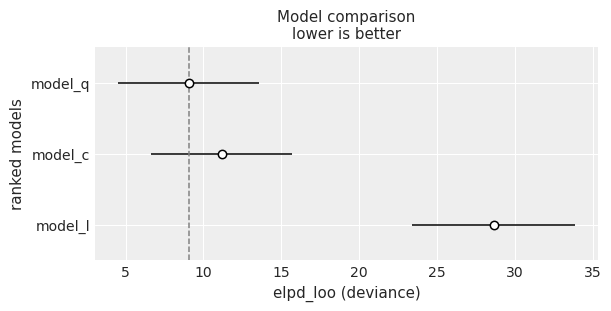

In [ ]:
cmp_df = az.compare({'model_l':idata_l, 'model_q':idata_q, 'model_c':idata_c}, method='BB-pseudo-BMA', ic="loo", scale="deviance")

print(cmp_df)

az.plot_compare(cmp_df)
plt.show()

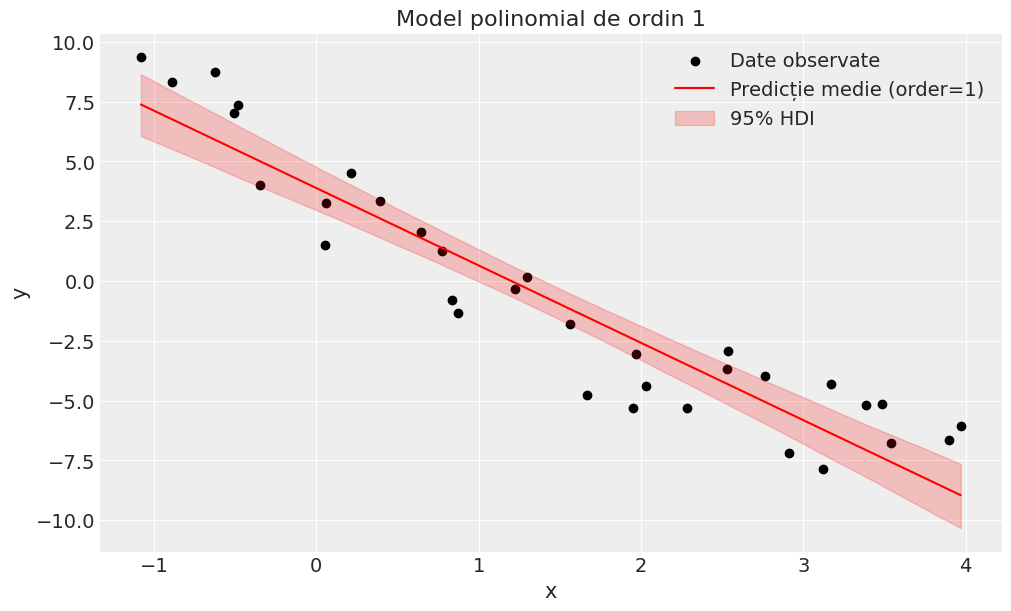

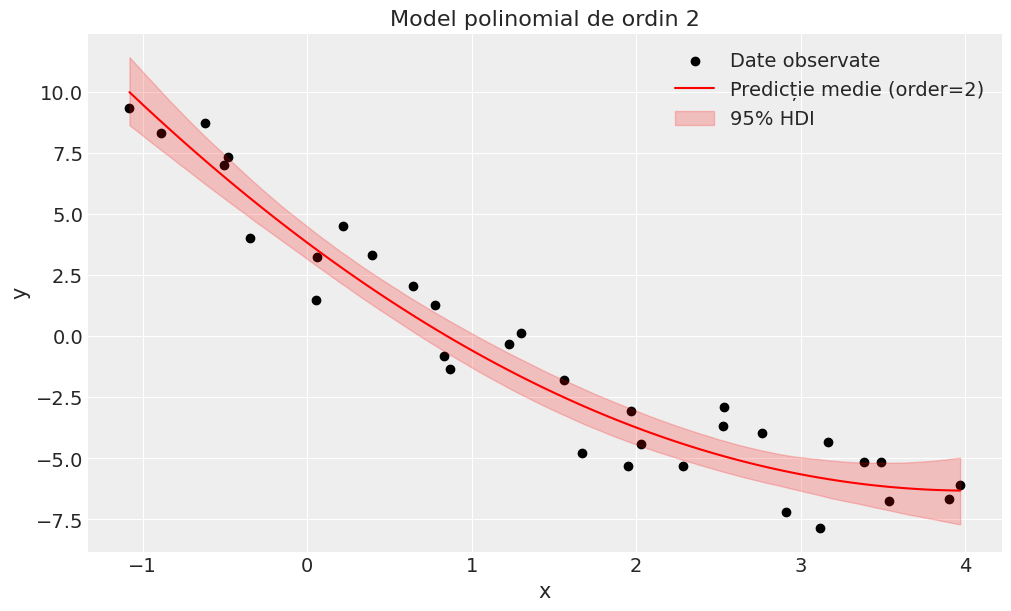

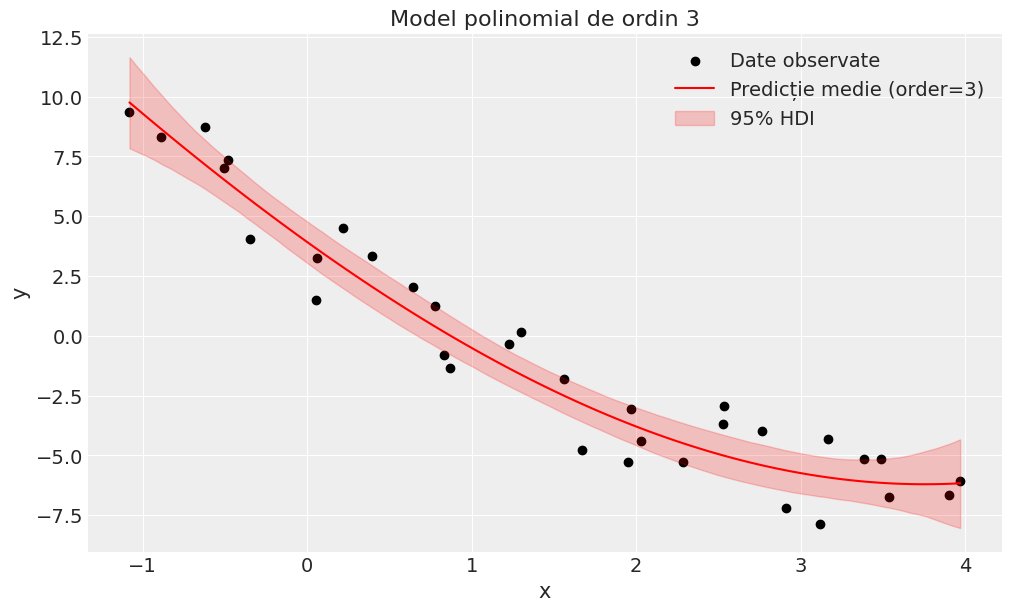

In [ ]:
#ordinul 1
fig, ax = plt.subplots(figsize=(10, 6))

x_new = np.linspace(x_1.min(), x_1.max(), 100)
x_p = np.vstack([x_new ** i for i in range(1, 1 + 1)])
x_new_s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)

alpha_samples = idata_l.posterior['alpha'].values.flatten()
beta_samples = idata_l.posterior['beta'].values.reshape(-1, 1)

y_pred_samples = []
for j in range(len(alpha_samples)):
    y_pred = alpha_samples[j] + np.dot(beta_samples[j], x_new_s)
    y_pred = y_pred * y_1.std() + y_1.mean()
    y_pred_samples.append(y_pred)

y_pred_samples = np.array(y_pred_samples)
mean_pred = np.mean(y_pred_samples, axis=0)
hdi_lower = np.percentile(y_pred_samples, 2.5, axis=0)
hdi_upper = np.percentile(y_pred_samples, 97.5, axis=0)

ax.scatter(x_1, y_1, color='black', label='Date observate')

ax.plot(x_new, mean_pred, color='red', label=f'Predicție medie (order={1})')
ax.fill_between(x_new, hdi_lower, hdi_upper, color='red', alpha=0.2, label='95% HDI')

ax.legend()
ax.set_title(f'Model polinomial de ordin 1')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()


#ordinul 2
fig, ax = plt.subplots(figsize=(10, 6))

x_new = np.linspace(x_1.min(), x_1.max(), 100)
x_p = np.vstack([x_new ** i for i in range(1, 2 + 1)])
x_new_s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)

alpha_samples = idata_q.posterior['alpha'].values.flatten()
beta_samples = idata_q.posterior['beta'].values.reshape(-1, 2)

y_pred_samples = []
for j in range(len(alpha_samples)):
    y_pred = alpha_samples[j] + np.dot(beta_samples[j], x_new_s)
    y_pred = y_pred * y_1.std() + y_1.mean()
    y_pred_samples.append(y_pred)

y_pred_samples = np.array(y_pred_samples)
mean_pred = np.mean(y_pred_samples, axis=0)
hdi_lower = np.percentile(y_pred_samples, 2.5, axis=0)
hdi_upper = np.percentile(y_pred_samples, 97.5, axis=0)

ax.scatter(x_1, y_1, color='black', label='Date observate')

ax.plot(x_new, mean_pred, color='red', label=f'Predicție medie (order={2})')
ax.fill_between(x_new, hdi_lower, hdi_upper, color='red', alpha=0.2, label='95% HDI')

ax.legend()
ax.set_title(f'Model polinomial de ordin 2')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()



#ordinul 3
fig, ax = plt.subplots(figsize=(10, 6))

x_new = np.linspace(x_1.min(), x_1.max(), 100)
x_p = np.vstack([x_new ** i for i in range(1, 3 + 1)])
x_new_s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)

alpha_samples = idata_c.posterior['alpha'].values.flatten()
beta_samples = idata_c.posterior['beta'].values.reshape(-1, 3)

y_pred_samples = []
for j in range(len(alpha_samples)):
    y_pred = alpha_samples[j] + np.dot(beta_samples[j], x_new_s)
    y_pred = y_pred * y_1.std() + y_1.mean()
    y_pred_samples.append(y_pred)

y_pred_samples = np.array(y_pred_samples)
mean_pred = np.mean(y_pred_samples, axis=0)
hdi_lower = np.percentile(y_pred_samples, 2.5, axis=0)
hdi_upper = np.percentile(y_pred_samples, 97.5, axis=0)


ax.scatter(x_1, y_1, color='black', label='Date observate')

ax.plot(x_new, mean_pred, color='red', label=f'Predicție medie (order={3})')
ax.fill_between(x_new, hdi_lower, hdi_upper, color='red', alpha=0.2, label='95% HDI')

ax.legend()
ax.set_title(f'Model polinomial de ordin 3')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

Ex. 2

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


         rank   elpd_waic    p_waic  elpd_diff    weight         se       dse  \
model_q     0  229.246484  3.944592   0.000000  0.476114  15.170700  0.000000   
model_c     1  230.473671  4.698881   1.227187  0.286553  14.763594  1.482135   
model_l     2  232.373884  3.167914   3.127400  0.237333  15.775714  4.091581   

         warning     scale  
model_q     True  deviance  
model_c     True  deviance  
model_l     True  deviance  


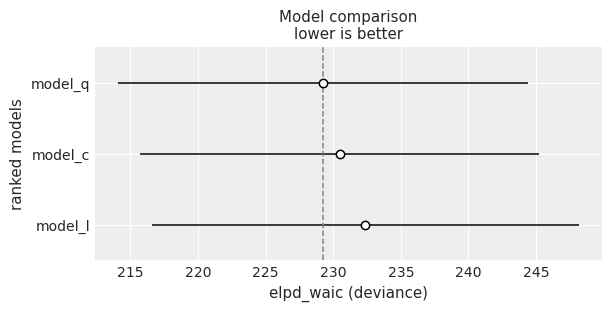

In [ ]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
az.style.use('arviz-darkgrid')

df = pd.read_csv('./date_studiu_nota.csv')

x_1 = df['Ore_Studiu']
y_1 = df['Nota_Finala']

order = 1   #liniar
x_p = np.vstack([x_1 ** i for i in range(1, order + 1)])
x_1s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
y_1s = (y_1 - y_1.mean()) / y_1.std()

with pm.Model() as model_l:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=1)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + beta * x_1s[0]
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_1s)
    idata_l = pm.sample(2000, init='jitter+adapt_diag', return_inferencedata=True)

order = 2   #quadratic
x_p = np.vstack([x_1 ** i for i in range(1, order + 1)])
x_2s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
y_2s = (y_1 - y_1.mean()) / y_1.std()

with pm.Model() as model_q:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_2s)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_2s)
    idata_q = pm.sample(2000, init='jitter+adapt_diag', return_inferencedata=True)

order = 3   #cubic
x_p = np.vstack([x_1 ** i for i in range(1, order + 1)])
x_3s = (x_p - x_p.mean(axis=1, keepdims=True)) / x_p.std(axis=1, keepdims=True)
y_3s = (y_1 - y_1.mean()) / y_1.std()

with pm.Model() as model_c:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=3)
    epsilon = pm.HalfNormal('epsilon', 5)
    mu = alpha + pm.math.dot(beta, x_3s)
    y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y_3s)
    idata_c = pm.sample(2000, init='jitter+adapt_diag', return_inferencedata=True)

pm.compute_log_likelihood(idata_l, model=model_l)
pm.compute_log_likelihood(idata_q, model=model_q)
pm.compute_log_likelihood(idata_c, model=model_c)

cmp_df = az.compare({'model_l':idata_l, 'model_q':idata_q, 'model_c':idata_c}, method='BB-pseudo-BMA', ic="waic", scale="deviance")

print(cmp_df)

az.plot_compare(cmp_df)
plt.show()

         rank    elpd_loo     p_loo  elpd_diff    weight         se       dse  \
model_q     0  229.309302  3.976001   0.000000  0.486377  15.269159  0.000000   
model_c     1  230.522876  4.723483   1.213574  0.303570  14.793864  1.491535   
model_l     2  232.388801  3.175373   3.079499  0.210053  15.751132  4.079260   

         warning     scale  
model_q    False  deviance  
model_c    False  deviance  
model_l    False  deviance  


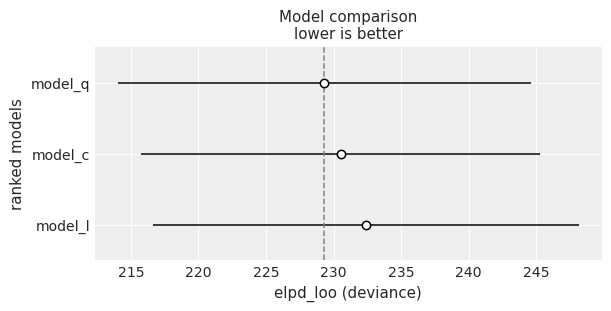

In [ ]:
cmp_df = az.compare({'model_l':idata_l, 'model_q':idata_q, 'model_c':idata_c}, method='BB-pseudo-BMA', ic="loo", scale="deviance")

print(cmp_df)

az.plot_compare(cmp_df)
plt.show()

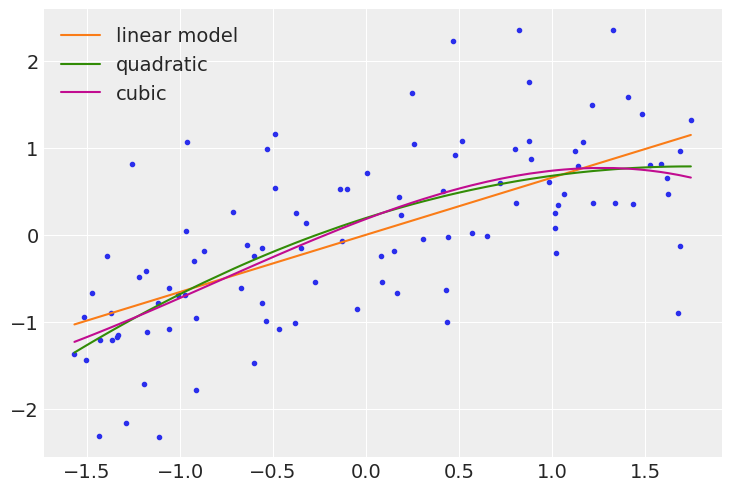

In [ ]:
'''
plt.scatter(x_1s[0], y_1s, c='C0', marker='.', label='Observed Data')
plt.plot(x_1s[0], y_1s, label='Linear Model', color='C1')
plt.plot(x_1s[0], y_2s, label='Polynomial Order 2', color='C2')
plt.plot(x_1s[0], y_3s, label='Polynomial Order 3', color='C3')
plt.legend()
plt.show()
'''


α_l_post = idata_l.posterior['alpha'].mean(("chain", "draw")).values
β_l_post = idata_l.posterior['beta'].mean(("chain", "draw")).values
idx = np.argsort(x_1s[0])
y_l_post = α_l_post + np.dot(β_l_post, x_1s)
plt.plot(x_1s[0][idx], y_l_post[idx], 'C1', label='linear model')

α_q_post = idata_q.posterior['alpha'].mean(("chain", "draw")).values
β_q_post = idata_q.posterior['beta'].mean(("chain", "draw")).values
idx = np.argsort(x_2s[0])
y_q_post = α_q_post + np.dot(β_q_post, x_2s)
plt.plot(x_2s[0][idx], y_q_post[idx], 'C2', label='quadratic')

α_c_post = idata_c.posterior['alpha'].mean(("chain", "draw")).values
β_c_post = idata_c.posterior['beta'].mean(("chain", "draw")).values
idx = np.argsort(x_3s[0])
y_c_post = α_c_post + np.dot(β_c_post, x_3s)
plt.plot(x_3s[0][idx], y_c_post[idx], 'C3', label='cubic')
plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
plt.legend()